In [49]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.initializers import glorot_uniform  # Or your initializer of choice
from keras.datasets import mnist
import numpy as np
import random
from keras.callbacks import TensorBoard

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()


In [50]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [51]:
print (x_train.shape)
print (x_test.shape)

Wsave = autoencoder.get_weights()
for a in Wsave:
    print(a.shape)
for layer in autoencoder.layers:
     print(layer.get_output_at(0).get_shape().as_list())

print(autoencoder.summary())

(60000, 784)
(10000, 784)
(784, 32)
(32,)
(32, 784)
(784,)
[None, 784]
[None, 32]
[None, 784]
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
x_train=x_train[0:50]
x_test=x_train[0:10]
print (x_train.shape)
print (x_test.shape)
def train():
    initial_weights = autoencoder.get_weights()
    weights = [glorot_uniform(seed=random.randint(0, 1000))(w.shape) if w.ndim > 1 else w for w in autoencoder.get_weights()]
    autoencoder.set_weights(new_weights)

    autoencoder.fit(x_train, x_train,
                    epochs=1000,
                    batch_size=10,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=1,
                    callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]
                   )
train()

(50, 784)
(10, 784)
Train on 50 samples, validate on 10 samples
Epoch 1/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6973 - val_loss: 0.6915
Epoch 2/1000
50/50 [==============================] - 0s 430us/step - loss: 0.6885 - val_loss: 0.6810
Epoch 3/1000
50/50 [==============================] - 0s 589us/step - loss: 0.6762 - val_loss: 0.6644
Epoch 4/1000
50/50 [==============================] - 0s 387us/step - loss: 0.6560 - val_loss: 0.6376
Epoch 5/1000
50/50 [==============================] - 0s 663us/step - loss: 0.6236 - val_loss: 0.5964
Epoch 6/1000
50/50 [==============================] - 0s 414us/step - loss: 0.5761 - val_loss: 0.5406
Epoch 7/1000
50/50 [==============================] - 0s 428us/step - loss: 0.5160 - val_loss: 0.4762
Epoch 8/1000
50/50 [==============================] - 0s 505us/step - loss: 0.4517 - val_loss: 0.4147
Epoch 9/1000
50/50 [==============================] - 0s 447us/step - loss: 0.3954 - val_loss: 0.3662
Epoch 10/1000
50/50 

/home/amir/.local/lib/python3.6/site-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.120027). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50/50 [==============================] - 0s 363us/step - loss: 0.2637 - val_loss: 0.2575
Epoch 21/1000
50/50 [==============================] - 0s 462us/step - loss: 0.2622 - val_loss: 0.2560
Epoch 22/1000
50/50 [==============================] - 0s 398us/step - loss: 0.2612 - val_loss: 0.2548
Epoch 23/1000
50/50 [==============================] - 0s 444us/step - loss: 0.2596 - val_loss: 0.2538
Epoch 24/1000
50/50 [==============================] - 0s 407us/step - loss: 0.2584 - val_loss: 0.2527
Epoch 25/1000
50/50 [==============================] - 0s 424us/step - loss: 0.2579 - val_loss: 0.2518
Epoch 26/1000
50/50 [==============================] - 0s 419us/step - loss: 0.2567 - val_loss: 0.2509
Epoch 27/1000
50/50 [==============================] - 0s 494us/step - loss: 0.2560 - val_loss: 0.2502
Epoch 28/1000
50/50 [==============================] - 0s 417us/step - loss: 0.2551 - val_loss: 0.2496
Epoch 29/1000
50/50 [==============================] - 0s 400us/step - loss: 0.2543 - v

Epoch 178/1000
50/50 [==============================] - 0s 397us/step - loss: 0.1750 - val_loss: 0.1709
Epoch 179/1000
50/50 [==============================] - 0s 457us/step - loss: 0.1746 - val_loss: 0.1707
Epoch 180/1000
50/50 [==============================] - 0s 395us/step - loss: 0.1741 - val_loss: 0.1703
Epoch 181/1000
50/50 [==============================] - 0s 337us/step - loss: 0.1737 - val_loss: 0.1699
Epoch 182/1000
50/50 [==============================] - 0s 447us/step - loss: 0.1733 - val_loss: 0.1695
Epoch 183/1000
50/50 [==============================] - 0s 426us/step - loss: 0.1729 - val_loss: 0.1693
Epoch 184/1000
50/50 [==============================] - 0s 348us/step - loss: 0.1725 - val_loss: 0.1688
Epoch 185/1000
50/50 [==============================] - 0s 447us/step - loss: 0.1721 - val_loss: 0.1684
Epoch 186/1000
50/50 [==============================] - 0s 428us/step - loss: 0.1715 - val_loss: 0.1680
Epoch 187/1000
50/50 [==============================] - 0s 391us

Epoch 257/1000
50/50 [==============================] - 0s 650us/step - loss: 0.1459 - val_loss: 0.1440
Epoch 258/1000
50/50 [==============================] - 0s 584us/step - loss: 0.1456 - val_loss: 0.1438
Epoch 259/1000
50/50 [==============================] - 0s 396us/step - loss: 0.1453 - val_loss: 0.1434
Epoch 260/1000
50/50 [==============================] - 0s 441us/step - loss: 0.1451 - val_loss: 0.1432
Epoch 261/1000
50/50 [==============================] - 0s 415us/step - loss: 0.1448 - val_loss: 0.1430
Epoch 262/1000
50/50 [==============================] - 0s 439us/step - loss: 0.1445 - val_loss: 0.1424
Epoch 263/1000
50/50 [==============================] - 0s 395us/step - loss: 0.1441 - val_loss: 0.1422
Epoch 264/1000
50/50 [==============================] - 0s 441us/step - loss: 0.1438 - val_loss: 0.1419
Epoch 265/1000
50/50 [==============================] - 0s 543us/step - loss: 0.1435 - val_loss: 0.1417
Epoch 266/1000
50/50 [==============================] - 0s 420us

Epoch 414/1000
50/50 [==============================] - 0s 408us/step - loss: 0.1114 - val_loss: 0.1093
Epoch 415/1000
50/50 [==============================] - 0s 439us/step - loss: 0.1113 - val_loss: 0.1090
Epoch 416/1000
50/50 [==============================] - 0s 549us/step - loss: 0.1111 - val_loss: 0.1089
Epoch 417/1000
50/50 [==============================] - 0s 456us/step - loss: 0.1109 - val_loss: 0.1086
Epoch 418/1000
50/50 [==============================] - 0s 558us/step - loss: 0.1108 - val_loss: 0.1086
Epoch 419/1000
50/50 [==============================] - 0s 480us/step - loss: 0.1107 - val_loss: 0.1084
Epoch 420/1000
50/50 [==============================] - 0s 377us/step - loss: 0.1105 - val_loss: 0.1081
Epoch 421/1000
50/50 [==============================] - 0s 508us/step - loss: 0.1104 - val_loss: 0.1080
Epoch 422/1000
50/50 [==============================] - 0s 402us/step - loss: 0.1103 - val_loss: 0.1080
Epoch 423/1000
50/50 [==============================] - 0s 470us

Epoch 493/1000
50/50 [==============================] - 0s 431us/step - loss: 0.1017 - val_loss: 0.0993
Epoch 494/1000
50/50 [==============================] - 0s 538us/step - loss: 0.1015 - val_loss: 0.0992
Epoch 495/1000
50/50 [==============================] - 0s 418us/step - loss: 0.1014 - val_loss: 0.0990
Epoch 496/1000
50/50 [==============================] - 0s 480us/step - loss: 0.1013 - val_loss: 0.0989
Epoch 497/1000
50/50 [==============================] - 0s 427us/step - loss: 0.1012 - val_loss: 0.0986
Epoch 498/1000
50/50 [==============================] - 0s 577us/step - loss: 0.1011 - val_loss: 0.0986
Epoch 499/1000
50/50 [==============================] - 0s 537us/step - loss: 0.1010 - val_loss: 0.0987
Epoch 500/1000
50/50 [==============================] - 0s 556us/step - loss: 0.1009 - val_loss: 0.0987
Epoch 501/1000
50/50 [==============================] - 0s 677us/step - loss: 0.1008 - val_loss: 0.0984
Epoch 502/1000
50/50 [==============================] - 0s 474us

Epoch 572/1000
50/50 [==============================] - 0s 595us/step - loss: 0.0947 - val_loss: 0.0921
Epoch 573/1000
50/50 [==============================] - 0s 464us/step - loss: 0.0946 - val_loss: 0.0918
Epoch 574/1000
50/50 [==============================] - 0s 395us/step - loss: 0.0945 - val_loss: 0.0919
Epoch 575/1000
50/50 [==============================] - 0s 464us/step - loss: 0.0945 - val_loss: 0.0919
Epoch 576/1000
50/50 [==============================] - 0s 426us/step - loss: 0.0943 - val_loss: 0.0919
Epoch 577/1000
50/50 [==============================] - 0s 488us/step - loss: 0.0943 - val_loss: 0.0917
Epoch 578/1000
50/50 [==============================] - 0s 444us/step - loss: 0.0942 - val_loss: 0.0917
Epoch 579/1000
50/50 [==============================] - 0s 480us/step - loss: 0.0942 - val_loss: 0.0915
Epoch 580/1000
50/50 [==============================] - 0s 399us/step - loss: 0.0941 - val_loss: 0.0916
Epoch 581/1000
50/50 [==============================] - 0s 436us

Epoch 651/1000
50/50 [==============================] - 0s 479us/step - loss: 0.0894 - val_loss: 0.0866
Epoch 652/1000
50/50 [==============================] - 0s 379us/step - loss: 0.0893 - val_loss: 0.0865
Epoch 653/1000
50/50 [==============================] - 0s 568us/step - loss: 0.0893 - val_loss: 0.0866
Epoch 654/1000
50/50 [==============================] - 0s 400us/step - loss: 0.0893 - val_loss: 0.0864
Epoch 655/1000
50/50 [==============================] - 0s 413us/step - loss: 0.0891 - val_loss: 0.0866
Epoch 656/1000
50/50 [==============================] - 0s 416us/step - loss: 0.0891 - val_loss: 0.0865
Epoch 657/1000
50/50 [==============================] - 0s 402us/step - loss: 0.0890 - val_loss: 0.0864
Epoch 658/1000
50/50 [==============================] - 0s 466us/step - loss: 0.0890 - val_loss: 0.0863
Epoch 659/1000
50/50 [==============================] - 0s 461us/step - loss: 0.0890 - val_loss: 0.0861
Epoch 660/1000
50/50 [==============================] - 0s 477us

50/50 [==============================] - 0s 358us/step - loss: 0.0817 - val_loss: 0.0791
Epoch 808/1000
50/50 [==============================] - 0s 402us/step - loss: 0.0817 - val_loss: 0.0791
Epoch 809/1000
50/50 [==============================] - 0s 437us/step - loss: 0.0817 - val_loss: 0.0790
Epoch 810/1000
50/50 [==============================] - 0s 546us/step - loss: 0.0817 - val_loss: 0.0791
Epoch 811/1000
50/50 [==============================] - 0s 473us/step - loss: 0.0816 - val_loss: 0.0789
Epoch 812/1000
50/50 [==============================] - 0s 411us/step - loss: 0.0816 - val_loss: 0.0789
Epoch 813/1000
50/50 [==============================] - 0s 442us/step - loss: 0.0816 - val_loss: 0.0789
Epoch 814/1000
50/50 [==============================] - 0s 440us/step - loss: 0.0815 - val_loss: 0.0788
Epoch 815/1000
50/50 [==============================] - 0s 434us/step - loss: 0.0815 - val_loss: 0.0787
Epoch 816/1000
50/50 [==============================] - 0s 594us/step - loss: 0

Epoch 886/1000
50/50 [==============================] - 0s 412us/step - loss: 0.0789 - val_loss: 0.0762
Epoch 887/1000
50/50 [==============================] - 0s 452us/step - loss: 0.0787 - val_loss: 0.0763
Epoch 888/1000
50/50 [==============================] - 0s 409us/step - loss: 0.0787 - val_loss: 0.0762
Epoch 889/1000
50/50 [==============================] - 0s 369us/step - loss: 0.0787 - val_loss: 0.0762
Epoch 890/1000
50/50 [==============================] - 0s 310us/step - loss: 0.0787 - val_loss: 0.0762
Epoch 891/1000
50/50 [==============================] - 0s 438us/step - loss: 0.0786 - val_loss: 0.0761
Epoch 892/1000
50/50 [==============================] - 0s 437us/step - loss: 0.0786 - val_loss: 0.0761
Epoch 893/1000
50/50 [==============================] - 0s 397us/step - loss: 0.0786 - val_loss: 0.0760
Epoch 894/1000
50/50 [==============================] - 0s 417us/step - loss: 0.0785 - val_loss: 0.0760
Epoch 895/1000
50/50 [==============================] - 0s 399us

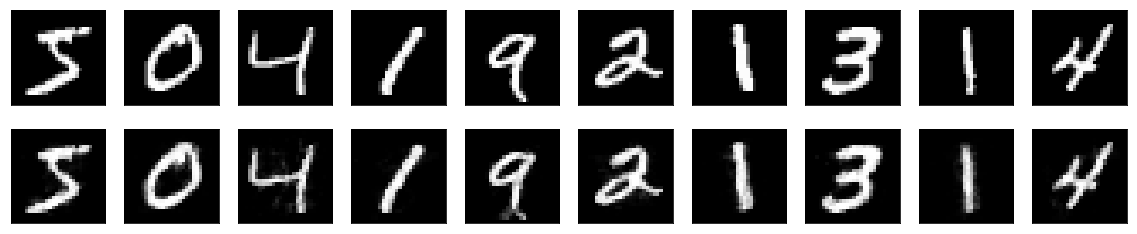

In [53]:

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

from keras.datasets import mnist
import numpy as np
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()